# Appliances energy prediction

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from datetime import datetime
import time
import dateutil
import pickle

In [3]:
# Loading the datasets
df = pd.read_csv("/content/drive/MyDrive/ML_Projects/Appliances energy prediction-complete/energydata_complete.csv")

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.shape

(19735, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

# From above table we can see that there are no null values present in dataset

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5f7876fd0>,
      dtype=object)

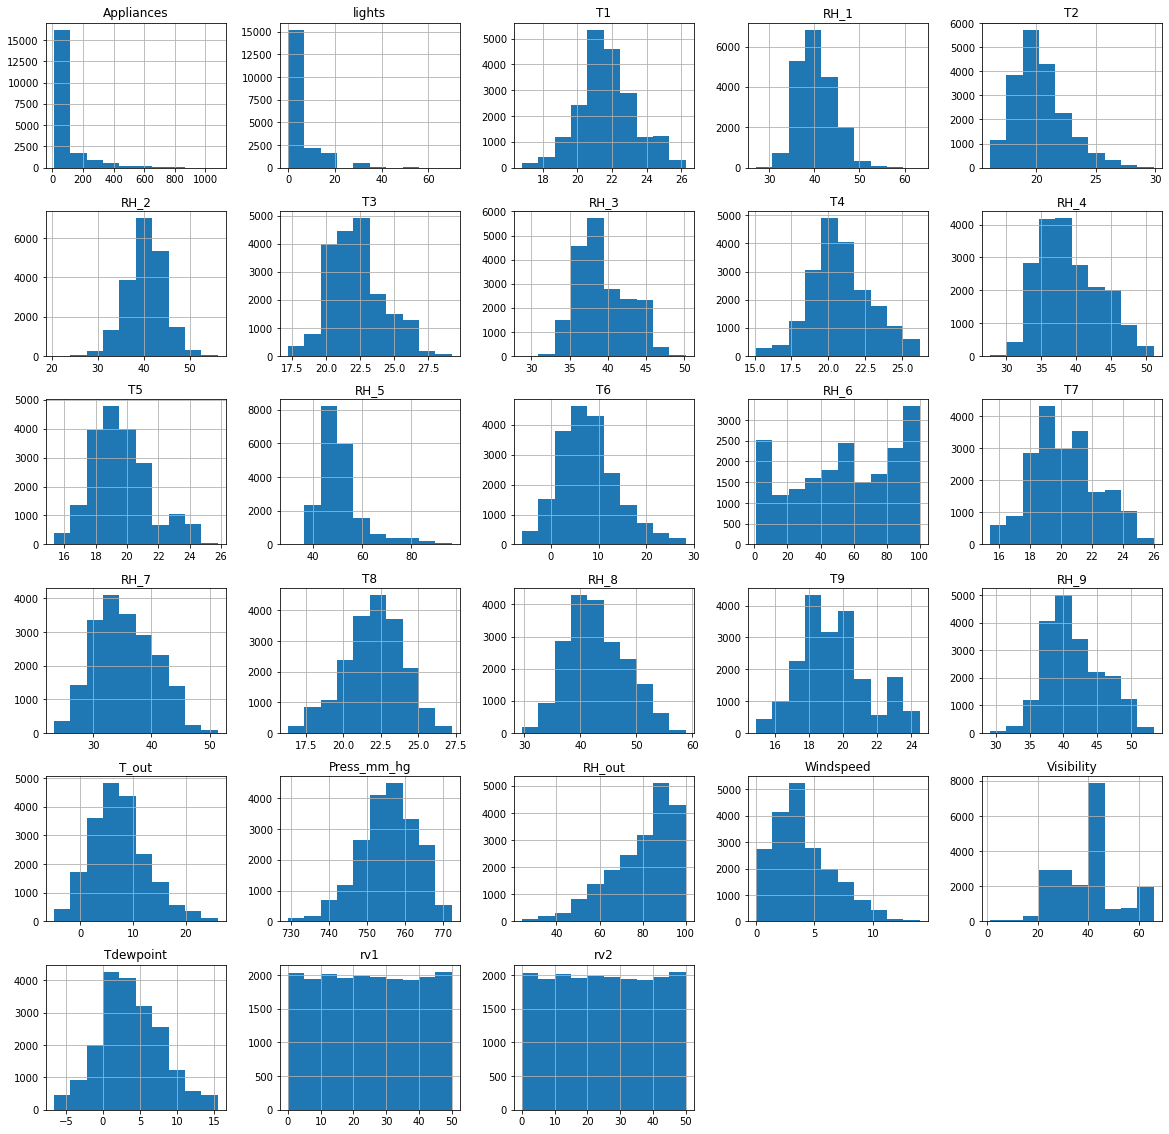

In [9]:
df.hist(figsize=(20, 20))

In [10]:
# This function take a dataframe
# as a parameter and returning list
# of column names whose contents 
# are duplicates.
def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

    # Driver code
if __name__ == "__main__" :
    # Get list of duplicate columns
    duplicateColNames = getDuplicateColumns(df)
  

    print('Duplicate Columns are :')
        
    # Iterate through duplicate
    # column names
    for column in duplicateColNames :
       print('Column Name : ', column)

Duplicate Columns are :
Column Name :  rv2


# rv1 and rv2 are having same values therefore we are dropping any 1 column

In [11]:
df=df.drop(["rv2"], axis = 1)

# Cheking for the Corelation among features

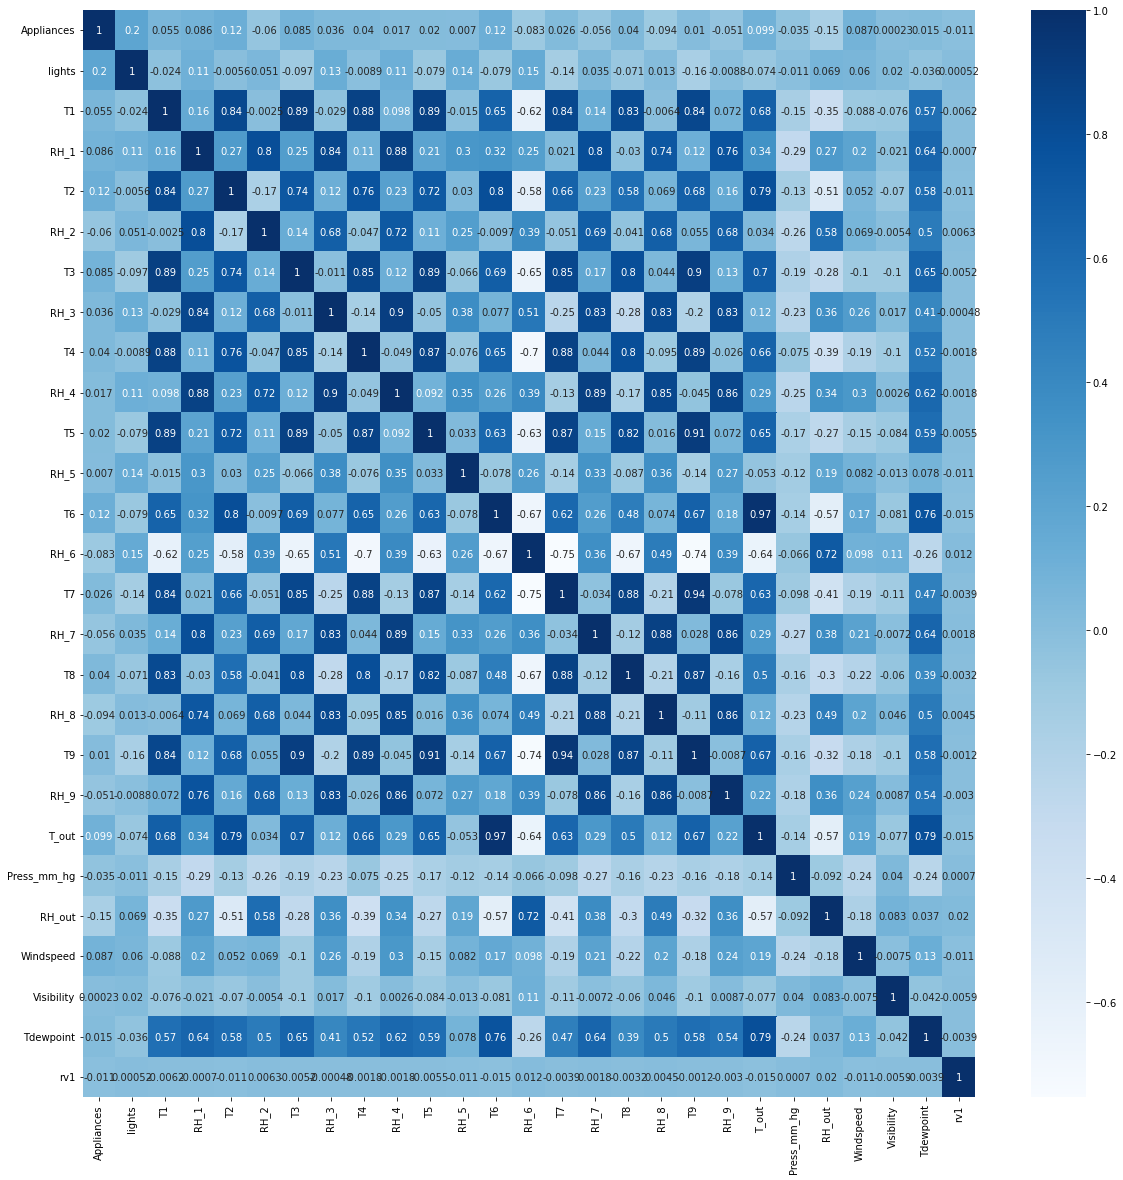

In [12]:
fig, ax = plt.subplots(figsize=(20,20)) 
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True, ax=ax)

In [13]:
# Convert correlation matrix to 1-D Series and sort
corr2 = df.corr(method='pearson')
sorted_mat = corr2["Appliances"].sort_values()
  
print(sorted_mat)

RH_out        -0.152282
RH_8          -0.094039
RH_6          -0.083178
RH_2          -0.060465
RH_7          -0.055642
RH_9          -0.051462
Press_mm_hg   -0.034885
rv1           -0.011145
Visibility     0.000230
RH_5           0.006955
T9             0.010010
Tdewpoint      0.015353
RH_4           0.016965
T5             0.019760
T7             0.025801
RH_3           0.036292
T8             0.039572
T4             0.040281
T1             0.055447
T3             0.085060
RH_1           0.086031
Windspeed      0.087122
T_out          0.099155
T6             0.117638
T2             0.120073
lights         0.197278
Appliances     1.000000
Name: Appliances, dtype: float64


In [14]:
df=df.drop(["Visibility","rv1","RH_5","T9","Tdewpoint","RH_4"], axis = 1)

In [15]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_6,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,84.256667,17.200000,41.626667,18.2000,48.900000,45.5300,6.600000,733.5,92.000000,7.000000
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,84.063333,17.200000,41.560000,18.2000,48.863333,45.5600,6.483333,733.6,92.000000,6.666667
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,83.156667,17.200000,41.433333,18.2000,48.730000,45.5000,6.366667,733.7,92.000000,6.333333
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,83.423333,17.133333,41.290000,18.1000,48.590000,45.4000,6.250000,733.8,92.000000,6.000000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,84.893333,17.200000,41.230000,18.1000,48.590000,45.4000,6.133333,733.9,92.000000,5.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,1.000000,24.500000,44.500000,24.7000,50.074000,46.7900,22.733333,755.2,55.666667,3.333333
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,1.000000,24.557143,44.414286,24.7000,49.790000,46.7900,22.600000,755.2,56.000000,3.500000
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,1.000000,24.540000,44.400000,24.7000,49.660000,46.7900,22.466667,755.2,56.333333,3.666667
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,1.000000,24.500000,44.295714,24.6625,49.518750,46.8175,22.333333,755.2,56.666667,3.833333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


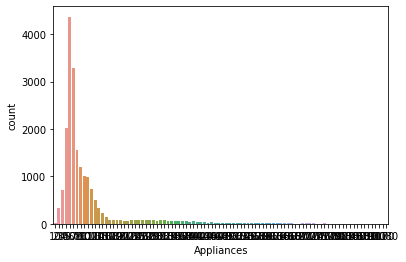

In [16]:
sns.countplot(df['Appliances'])

From above graph we can see that the graph is positive skewed

## Spliting the date

In [17]:
df["exact_date"]=df['date'].str.split(' ').str[0]

df["hours"]=(df['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
df["seconds"]=((df['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

df["days"]=(df['date'].str.split(' ').str[0])
df["days"]=(df['days'].apply(dateutil.parser.parse, dayfirst=True))
df["days_num"]=(df['days'].dt.dayofweek).astype(str).astype(int)
df["days"]=(df['days'].dt.day_name())

exact_date
2016-01-11    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-12    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-13    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-14    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-15    AxesSubplot(0.125,0.125;0.775x0.755)
                              ...                 
2016-05-23    AxesSubplot(0.125,0.125;0.775x0.755)
2016-05-24    AxesSubplot(0.125,0.125;0.775x0.755)
2016-05-25    AxesSubplot(0.125,0.125;0.775x0.755)
2016-05-26    AxesSubplot(0.125,0.125;0.775x0.755)
2016-05-27    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Appliances, Length: 138, dtype: object

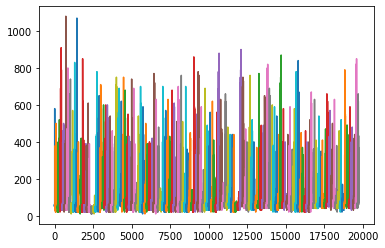

In [18]:
df.groupby('exact_date')['Appliances'].plot()

Text(0.5, 1.0, 'Mean Energy Consumption per Hour of a Day')

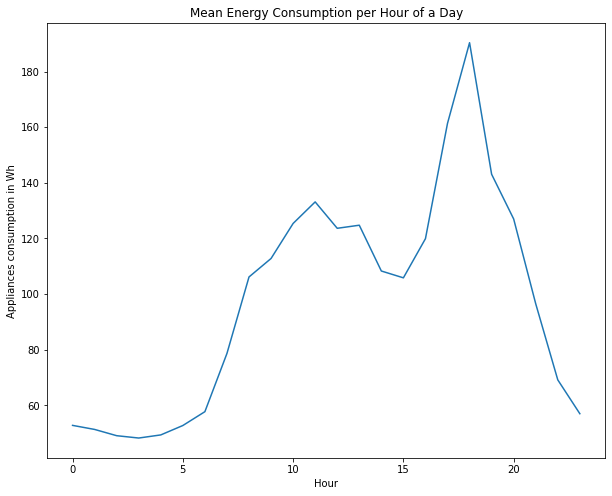

In [19]:
df.groupby('hours')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
                                                           
plt.title('Mean Energy Consumption per Hour of a Day')

In [20]:
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,exact_date,hours,seconds,days,days_num
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,2016-01-11,17,0,Tuesday,1
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,2016-01-11,17,600,Tuesday,1
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,2016-01-11,17,1200,Tuesday,1


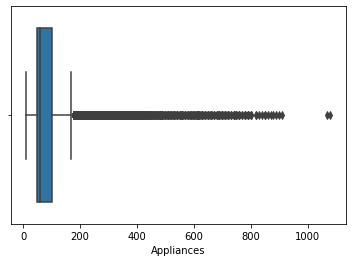

In [21]:
import seaborn as sns
sns.boxplot(x=df['Appliances'])

In [22]:
X=df[['Appliances']]
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)

dfOutlier=X.describe()
outlierSet=set()
for column in dfOutlier.columns:
    Q1 = dfOutlier[column]['25%']
    Q3 = dfOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((X[column] < (Q1 - 1.5 * IQR)) |(X[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
        

df.drop(outlierSet, inplace=True, axis=0)

Outlier threshold of Appliances  Appliances    50.0
dtype: float64


# Draph after removing Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


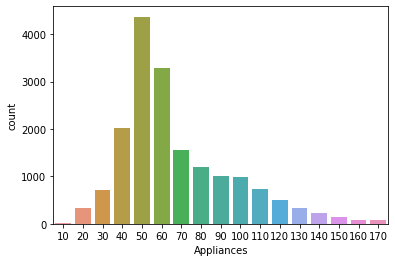

In [23]:
sns.countplot(df['Appliances'])

# Droping some features as they are less impactful on target feature

In [24]:
df=df.drop(["date","lights","exact_date","days","seconds","days_num"], axis = 1)

In [25]:
df.shape

(17597, 21)

In [26]:
df.head(3)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,T5,T6,...,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,hours
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,17.166667,7.026667,...,17.2,41.626667,18.2,48.900000,45.53,6.600000,733.5,92.0,7.000000,17
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,17.166667,6.833333,...,17.2,41.560000,18.2,48.863333,45.56,6.483333,733.6,92.0,6.666667,17
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,17.166667,6.560000,...,17.2,41.433333,18.2,48.730000,45.50,6.366667,733.7,92.0,6.333333,17


In [27]:

df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'hours'],
      dtype='object')

# **Split dataset into Train and Test**

In [28]:
# selecting label and features
X = df.drop('Appliances',axis=1)
y= df['Appliances']  

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [30]:
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for each model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Linear Regressor

In [31]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred_lr = lin_model.predict(X_test)

In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('r2_score:', metrics.r2_score(y_test, y_pred_lr)) 

Mean Absolute Error: 17.507524311928407
Mean Squared Error: 565.3603565992258
Root Mean Squared Error: 23.77730759777536
r2_score: 0.3090806683689602


In [34]:
errors = abs(y_pred_lr - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 70.43 %.


# Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [36]:
y_pred_rf = rf_model.predict(X_test)

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('r2_score:', metrics.r2_score(y_test, y_pred_rf)) 

Mean Absolute Error: 10.482113636363637
Mean Squared Error: 244.11430681818186
Root Mean Squared Error: 15.62415779548395
r2_score: 0.7016711700074943


In [38]:
errors = abs(y_pred_rf - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.49 %.


# pickle file

In [39]:
# Saving model to disk
pickle.dump(rf_model, open('energy_model.pkl','wb'))

# Loading model to compare the results
#model = pickle.load(open('energy_model.pkl','rb'))
#print(model.predict([[2, 9, 6,57,43,32,54,62,,,,,,]]))